In [1]:
# pip install git+https://github.com/AutoViML/featurewiz.git

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
from typing import Tuple, List, Dict

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline


# read data
in_kaggle = False


def get_data_file_path(is_in_kaggle: bool) -> Tuple[str, str, str]:
    train_path = ''
    test_path = ''
    sample_submission_path = ''

    if is_in_kaggle:
        # running in Kaggle, inside the competition
        train_path = '../input/tabular-playground-series-jan-2021/train.csv'
        test_path = '../input/tabular-playground-series-jan-2021/test.csv'
        sample_submission_path = '../input/tabular-playground-series-jan-2021/sample_submission.csv'
    else:
        # running locally
        train_path = 'data/train.csv'
        test_path = 'data/test.csv'
        sample_submission_path = 'data/sample_submission.csv'

    return train_path, test_path, sample_submission_path

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)

Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# main flow
start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2021-01-28 16:08:18.457140


In [4]:
%%time
# get the training set and labels
train_set_path, test_set_path, sample_subm_path = get_data_file_path(in_kaggle)

df_train = pd.read_csv(train_set_path)
df_test = pd.read_csv(test_set_path)

subm = pd.read_csv(sample_subm_path)

# list of feature columns
feature_list = [col for col in df_train.columns if col.startswith('cont')]

Wall time: 1.42 s


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [6]:
%%time
# Additional feature engineering routines

# add additional features pre-selected in the previous featurewiz feature importance experiments
def add_extra_features(
    train: pd.DataFrame, 
    test: pd.DataFrame) -> [pd.DataFrame, pd.DataFrame]:
    
    small_val = 0.00001
    for df in [train, test]:
        df['c_std'] = df[feature_list].std(axis=1)
        df['c_kurt'] = df[feature_list].kurtosis(axis=1)
        df['cont2_squared'] = df['cont2'] ** 2
        df['cont3_squared'] = df['cont3'] ** 2
        df['cont9_squared'] = df['cont9'] ** 2
        df['cont12_squared'] = df['cont12'] ** 2
        df['cont14_squared'] = df['cont14'] ** 2
        df['cont7_squared'] = df['cont7'] ** 2
        df['cont13_squared'] = df['cont13'] ** 2
        df['cont8_squared'] = df['cont8'] ** 2
        df['cont11_plus_cont3'] = df['cont11'] + df['cont3']
        df['cont13_plus_cont3'] = df['cont13'] + df['cont3']
        df['cont1_plus_cont4'] = df['cont1'] + df['cont4']
        df['cont5_plus_cont11'] = df['cont5'] + df['cont11']
        df['cont3_plus_cont8'] = df['cont3'] + df['cont8']
        df['cont3_plus_cont14'] = df['cont3'] + df['cont14']
        df['cont4_plus_cont3'] = df['cont4'] + df['cont3']
        df['cont4_plus_cont2'] = df['cont4'] + df['cont2']
        df['cont14_plus_cont11'] = df['cont14'] + df['cont11']
        df['cont14_plus_cont4'] = df['cont14'] + df['cont4']
        df['cont10_minus_cont12'] = df['cont10'] - df['cont12']
        df['cont13_minus_cont2'] = df['cont13'] - df['cont2']
        df['cont11_minus_cont10'] = df['cont11'] - df['cont10']
        df['cont4_minus_cont11'] = df['cont4'] - df['cont11']
        df['cont1_minus_cont6'] = df['cont1'] - df['cont6']
        df['cont5_minus_cont4'] = df['cont5'] - df['cont4']
        df['cont13_minus_cont10'] = df['cont13'] - df['cont10']
        df['cont13_minus_cont6'] = df['cont13'] - df['cont6']
        df['cont10_minus_cont6'] = df['cont10'] - df['cont6']
        df['cont13_minus_cont8'] = df['cont13'] - df['cont8']
        df['cont14_minus_cont13'] = df['cont14'] - df['cont13']
        df['cont9_minus_cont13'] = df['cont9'] - df['cont13']
        df['cont7_minus_cont13'] = df['cont7'] - df['cont13']
        df['cont12_minus_cont8'] = df['cont12'] - df['cont8']
        df['cont2_minus_cont3'] = df['cont2'] - df['cont3']
        df['cont8_minus_cont4'] = df['cont8'] - df['cont4']
        df['cont12_minus_cont6'] = df['cont12'] - df['cont6']
        df['cont5_minus_cont2'] = df['cont5'] - df['cont12']
        df['cont14_minus_cont8'] = df['cont14'] - df['cont8']
        df['cont10_minus_cont9'] = df['cont10'] - df['cont9']
        df['cont1_minus_cont9'] = df['cont1'] - df['cont9']
        df['cont9_minus_cont12'] = df['cont9'] - df['cont12']
        df['cont6_minus_cont11'] = df['cont6'] - df['cont11']
        df['cont6_minus_cont9'] = df['cont6'] - df['cont9']
        df['cont14_minus_cont4'] = df['cont14'] - df['cont4']
        df['cont7_minus_cont11'] = df['cont7'] - df['cont11']
        df['cont1_minus_cont10'] = df['cont1'] - df['cont10']
        df['cont12_minus_cont11'] = df['cont12'] - df['cont11']
        df['cont4_prod_cont3'] = df['cont4'] * df['cont3']
        df['cont4_prod_cont2'] = df['cont4'] * df['cont2']
        df['cont11_prod_cont4'] = df['cont11'] * df['cont4']
        df['cont11_prod_cont3'] = df['cont11'] * df['cont3']
        df['cont13_prod_cont3'] = df['cont13'] * df['cont3']
        df['cont12_prod_cont5'] = df['cont12'] * df['cont5']
        df['cont14_prod_cont11'] = df['cont14'] * df['cont11']
        df['cont8_prod_cont3'] = df['cont8'] * df['cont3']
        df['cont14_prod_cont3'] = df['cont14'] * df['cont3']
        df['cont12_qq_cont10'] = (df['cont12'] + df['cont10']) * (df['cont12'] - df['cont10'])
        df['cont10_qq_cont6'] = (df['cont10'] + df['cont6']) * (df['cont10'] - df['cont6'])
        df['cont1_qq_cont6'] = (df['cont1'] + df['cont6']) * (df['cont1'] - df['cont6'])
        df['cont13_qq_cont10'] = (df['cont13'] + df['cont10']) * (df['cont13'] - df['cont10'])
        df['cont11_qq_cont13'] = (df['cont11'] + df['cont13']) * (df['cont11'] - df['cont13'])
        df['cont4_qq_cont11'] = (df['cont4'] + df['cont11']) * (df['cont4'] - df['cont11'])
        df['cont8_qq_cont10'] = (df['cont8'] + df['cont10']) * (df['cont8'] - df['cont10'])
        df['cont9_qq_cont13'] = (df['cont9'] + df['cont13']) * (df['cont9'] - df['cont13'])
        df['cont13_qq_cont2'] = (df['cont13'] + df['cont2']) * (df['cont13'] - df['cont2'])
        df['cont5_qq_cont9'] = (df['cont5'] + df['cont9']) * (df['cont5'] - df['cont9'])
        df['cont7_qq_cont2'] = (df['cont7'] + df['cont2']) * (df['cont7'] - df['cont2'])
        df['cont1_qq_cont12'] = (df['cont1'] + df['cont12']) * (df['cont1'] - df['cont12'])
        df['cont3_qq_cont11'] = (df['cont3'] + df['cont11']) * (df['cont3'] - df['cont11'])
        df['cont5_qq_cont4'] = (df['cont5'] + df['cont4']) * (df['cont5'] - df['cont4'])
        df['cont10_qq_cont9'] = (df['cont10'] + df['cont9']) * (df['cont10'] - df['cont9'])
        df['cont7_qq_cont9'] = (df['cont7'] + df['cont9']) * (df['cont7'] - df['cont9'])
        df['cont3_qq_cont2'] = (df['cont3'] + df['cont2']) * (df['cont3'] - df['cont2'])
        df['cont1_qq_cont9'] = (df['cont1'] + df['cont9']) * (df['cont1'] - df['cont9'])
        df['cont14_qq_cont8'] = (df['cont14'] + df['cont8']) * (df['cont14'] - df['cont8'])
        df['cont8_qq_cont2'] = (df['cont8'] + df['cont2']) * (df['cont8'] - df['cont2'])
        df['cont5_qq_cont14'] = (df['cont5'] + df['cont14']) * (df['cont5'] - df['cont14'])
        df['cont6_qq_cont12'] = (df['cont6'] + df['cont12']) * (df['cont6'] - df['cont12'])
        df['cont11_qq_cont14'] = (df['cont11'] + df['cont14']) * (df['cont11'] - df['cont14'])
        df['cont12_qq_cont11'] = (df['cont12'] + df['cont11']) * (df['cont12'] - df['cont11'])
        df['cont1_qq_cont10'] = (df['cont1'] + df['cont10']) * (df['cont1'] - df['cont10'])
        df['cont4_qq_cont8'] = (df['cont4'] + df['cont8']) * (df['cont4'] - df['cont8'])
        df['cont10_div2_cont12'] = (df['cont10'] - df['cont12']) / (df['cont10'] + df['cont12'] + small_val)
        df['cont7_div2_cont1'] = (df['cont7'] - df['cont1']) / (df['cont7'] + df['cont1'] + small_val)
        df['cont10_div2_cont11'] = (df['cont10'] - df['cont11']) / (df['cont10'] + df['cont11'] + small_val)
        df['cont10_div2_cont6'] = (df['cont10'] - df['cont6']) / (df['cont10'] + df['cont6'] + small_val)
        df['cont12_div2_cont13'] = (df['cont12'] - df['cont13']) / (df['cont12'] + df['cont13'] + small_val)
        df['cont13_div2_cont8'] = (df['cont13'] - df['cont8']) / (df['cont13'] + df['cont8'] + small_val)
        df['cont9_div2_cont2'] = (df['cont9'] - df['cont2']) / (df['cont9'] + df['cont2'] + small_val)
        df['cont7_div2_cont4'] = (df['cont7'] - df['cont4']) / (df['cont7'] + df['cont4'] + small_val)
        df['cont9_div2_cont3'] = (df['cont9'] - df['cont3']) / (df['cont9'] + df['cont3'] + small_val)
        df['cont13_div2_cont1'] = (df['cont13'] - df['cont1']) / (df['cont13'] + df['cont1'] + small_val)
        df['cont10_div2_cont13'] = (df['cont10'] - df['cont13']) / (df['cont10'] + df['cont13'] + small_val)
        df['cont11_div2_cont3'] = (df['cont11'] - df['cont3']) / (df['cont11'] + df['cont3'] + small_val)
        df['cont7_div2_cont10'] = (df['cont7'] - df['cont10']) / (df['cont7'] + df['cont10'] + small_val)
        df['cont10_div2_cont1'] = (df['cont10'] - df['cont1']) / (df['cont10'] + df['cont1'] + small_val)
        df['cont8_div2_cont11'] = (df['cont8'] - df['cont11']) / (df['cont8'] + df['cont11'] + small_val)
        df['cont11_div2_cont9'] = (df['cont11'] - df['cont9']) / (df['cont11'] + df['cont9'] + small_val)
        df['cont9_div2_cont6'] = (df['cont9'] - df['cont6']) / (df['cont9'] + df['cont6'] + small_val)
        df['cont4_div2_cont14'] = (df['cont4'] - df['cont14']) / (df['cont4'] + df['cont14'] + small_val)
        df['cont4_div2_cont5'] = (df['cont4'] - df['cont5']) / (df['cont4'] + df['cont5'] + small_val)
        df['cont9_div2_cont1'] = (df['cont9'] - df['cont1']) / (df['cont9'] + df['cont1'] + small_val)
        df['cont8_div2_cont4'] = (df['cont8'] - df['cont4']) / (df['cont8'] + df['cont4'] + small_val)
        df['cont14_div2_cont5'] = (df['cont14'] - df['cont5']) / (df['cont14'] + df['cont5'] + small_val)
        df['cont9_div2_cont7'] = (df['cont9'] - df['cont7']) / (df['cont9'] + df['cont7'] + small_val)
        df['cont8_div2_cont14'] = (df['cont8'] - df['cont14']) / (df['cont8'] + df['cont14'] + small_val)
        df['cont6_div2_cont12'] = (df['cont6'] - df['cont12']) / (df['cont6'] + df['cont12'] + small_val)
        df['cont9_div2_cont8'] = (df['cont9'] - df['cont8']) / (df['cont9'] + df['cont8'] + small_val)
        df['cont6_div2_cont7'] = (df['cont6'] - df['cont7']) / (df['cont6'] + df['cont7'] + small_val)
        df['cont10_div2_cont9'] = (df['cont10'] - df['cont9']) / (df['cont10'] + df['cont9'] + small_val)
        df['cont7_div2_cont12'] = (df['cont7'] - df['cont12']) / (df['cont7'] + df['cont12'] + small_val)
        df['cont11_div2_cont12'] = (df['cont11'] - df['cont12']) / (df['cont11'] + df['cont12'] + small_val)
        df['cont11_div2_cont7'] = (df['cont11'] - df['cont7']) / (df['cont11'] + df['cont7'] + small_val)
        df['cont12_div2_cont10'] = (df['cont12'] - df['cont10']) / (df['cont12'] + df['cont10'] + small_val)
        df['cont11_div2_cont10'] = (df['cont11'] - df['cont10']) / (df['cont11'] + df['cont10'] + small_val)
        df['cont6_div2_cont10'] = (df['cont6'] - df['cont10']) / (df['cont6'] + df['cont10'] + small_val)
        df['cont8_div2_cont13'] = (df['cont8'] - df['cont13']) / (df['cont8'] + df['cont13'] + small_val)
        df['cont4_div2_cont8'] = (df['cont4'] - df['cont8']) / (df['cont4'] + df['cont8'] + small_val)
        df['cont13_div2_cont10'] = (df['cont13'] - df['cont10']) / (df['cont13'] + df['cont10'] + small_val)
        df['cont5_div2_cont4'] = (df['cont5'] - df['cont4']) / (df['cont5'] + df['cont4'] + small_val)
        df['cont10_div2_cont7'] = (df['cont10'] - df['cont7']) / (df['cont10'] + df['cont7'] + small_val)
        df['cont3_div2_cont9'] = (df['cont3'] - df['cont9']) / (df['cont3'] + df['cont9'] + small_val)
        df['cont9_div2_cont11'] = (df['cont9'] - df['cont11']) / (df['cont9'] + df['cont11'] + small_val)
        df['cont1_div2_cont9'] = (df['cont1'] - df['cont9']) / (df['cont1'] + df['cont9'] + small_val)
        df['cont3_div2_cont11'] = (df['cont3'] - df['cont11']) / (df['cont3'] + df['cont11'] + small_val)
        df['cont3_div2_cont5'] = (df['cont3'] - df['cont5']) / (df['cont3'] + df['cont5'] + small_val)
        df['cont14_div2_cont8'] = (df['cont14'] - df['cont8']) / (df['cont14'] + df['cont8'] + small_val)
        df['cont9_div2_cont10'] = (df['cont9'] - df['cont10']) / (df['cont9'] + df['cont10'] + small_val)
        df['cont9_div2_cont10'] = (df['cont9'] - df['cont10']) / (df['cont9'] + df['cont10'] + small_val)
        df['cont12_div2_cont11'] = (df['cont12'] - df['cont11']) / (df['cont12'] + df['cont11'] + small_val)
    
    return train, test

# add extra features
df_train, df_test = add_extra_features(df_train, df_test)


Wall time: 2.49 s


Imported featurewiz: Auto_ViML's feature engg and selection library. Version=0.0.14
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Let featurewiz add features to your data! Set 'feature_engg' as: 'interactions' or 'groupby' or 'target'
                                
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Shape of your Data Set loaded: (300000, 146)
    No GPU active on this device
    Running XGBoost using CPU parameters
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    145 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
#### Single_Label Regression Feature Selection Started ####
Searching for highly correlated variables from 144 variable

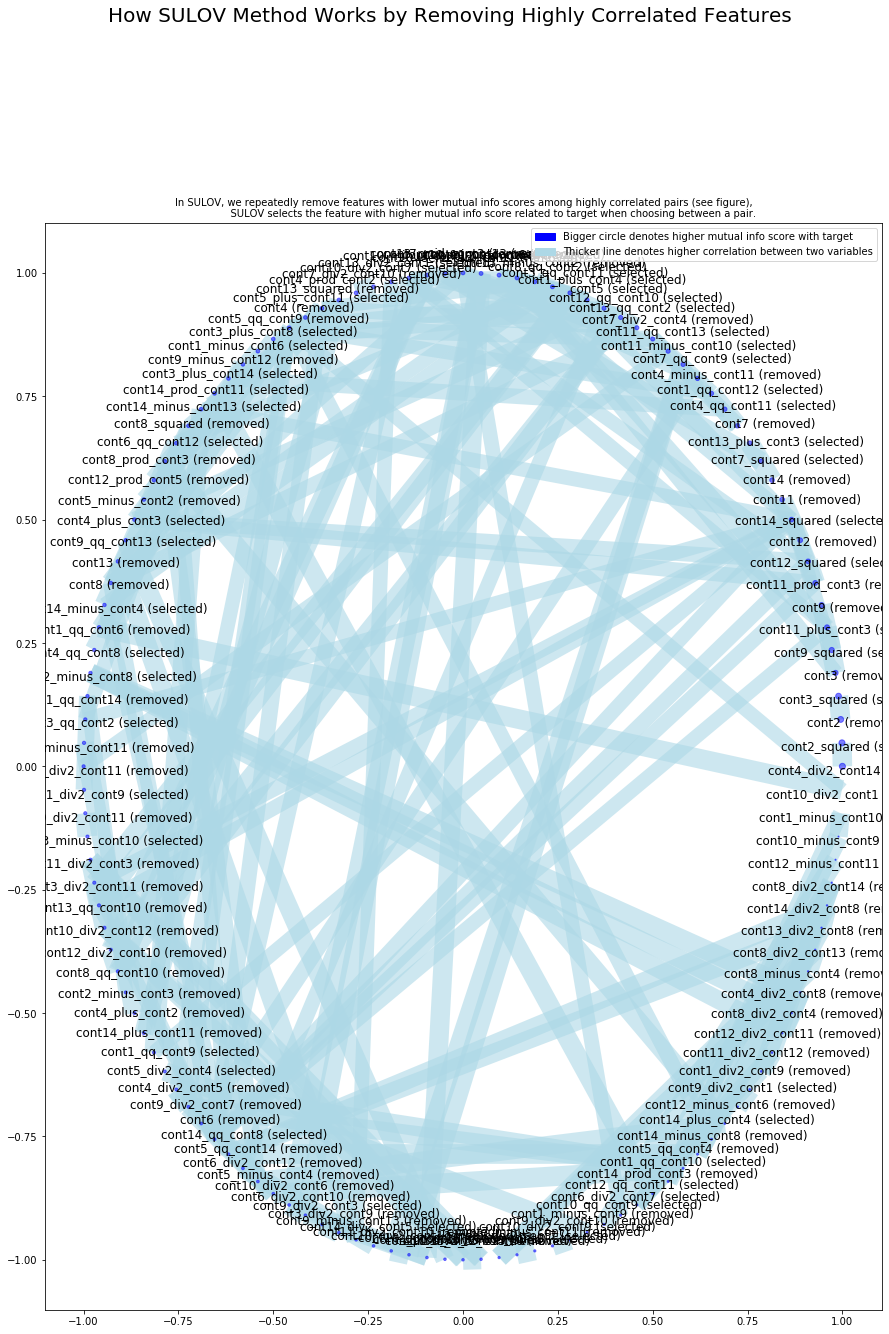

    Adding 0 categorical variables to reduced numeric variables  of 65
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 65 
    Finding Important Features using Boosted Trees algorithm...
        using 65 variables...
        using 52 variables...
        using 39 variables...
        using 26 variables...
        using 13 variables...
Selected 38 important features from your dataset
    Time taken (in seconds) = 3112
Returning list of 38 important features and dataframe.


In [7]:
from featurewiz import featurewiz

df_train_out, df_test_out = featurewiz(
    dataname=df_train, 
    target='target', 
    corr_limit=0.7, 
    verbose=0, 
    sep=",",
    header=0,
    test_data=df_test, 
    feature_engg="", 
    category_encoders="")

As a result, we can see the following feature choices made by *featurewiz*

In [8]:
print('Selected variables:')
print('---------------------')
print(df_train_out)


Selected variables:
---------------------
['cont12_qq_cont10', 'cont2_squared', 'cont3_squared', 'cont14_squared', 'cont7_squared', 'cont4_plus_cont3', 'cont4_qq_cont11', 'cont10', 'cont1_minus_cont6', 'cont1_plus_cont4', 'cont3_qq_cont11', 'cont13_minus_cont8', 'cont10_minus_cont6', 'cont7_div2_cont1', 'cont11_minus_cont10', 'cont4_prod_cont2', 'cont10_div2_cont7', 'cont12_squared', 'cont11_div2_cont9', 'cont13_minus_cont10', 'cont14_minus_cont13', 'cont9_qq_cont13', 'cont9_div2_cont3', 'cont5_div2_cont4', 'cont4_qq_cont8', 'cont12_minus_cont8', 'cont9_div2_cont1', 'cont14_plus_cont4', 'cont3_qq_cont2', 'cont1_qq_cont9', 'cont10_div2_cont9', 'cont10_qq_cont9', 'cont12_qq_cont11', 'cont14_div2_cont5', 'cont14_qq_cont8', 'cont6_div2_cont7', 'cont11_div2_cont7', 'cont1_qq_cont10']


In [9]:
print('We are done. That is all, folks!')
finish_time = dt.datetime.now()
print("Finished at ", finish_time)
elapsed = finish_time - start_time
print("Elapsed time: ", elapsed)

We are done. That is all, folks!
Finished at  2021-01-28 17:00:16.472040
Elapsed time:  0:51:58.014900
